In [1]:
import json
import networkx as nx
import torch
import torch_geometric.transforms as T
from matplotlib import pyplot as plt
from torch_geometric.utils import to_networkx

import glgexplainer.utils as utils
from glgexplainer.local_explainations import read_lattice, lattice_classnames
from glgexplainer.models import LEN, GLGExplainer, LEEmbedder
from gnn4ua.datasets.loader import Targets, GeneralisationModes

ImportError: cannot import name 'lattice_classnames' from 'glgexplainer.local_explainations' (/Users/matthewhattrup/Desktop/Geometric DL/part2/AI4UA/glgexplainer/local_explainations.py)

In [2]:
DATASET_NAME = Targets.Distributive
generalisation_mode = GeneralisationModes.weak
task = DATASET_NAME
with open(f"config/{DATASET_NAME}_params.json") as json_file:
	hyper_params = json.load(json_file)

In [3]:
adjs_train, edge_weights_train, ori_classes_train, belonging_train, summary_predictions_train, le_classes_train = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='train'
)

adjs_test, edge_weights_test, ori_classes_test, belonging_test, summary_predictions_test, le_classes_test = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='test'
)

device = "cpu"  # torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = T.Compose([
	T.NormalizeFeatures(),
])

In [4]:
dataset_train = utils.LocalExplanationsDataset("data_glg", adjs_train, "same",
											   transform=transform,
											   y=le_classes_train,
											   belonging=belonging_train,
											   task_y=ori_classes_train)
dataset_test = utils.LocalExplanationsDataset("data_glg", adjs_test, "same",
											  transform=transform,
											  y=le_classes_test,
											  belonging=belonging_test,
											  task_y=ori_classes_test)

train_group_loader = utils.build_dataloader(dataset_train, belonging_train,
											num_input_graphs=128)
test_group_loader = utils.build_dataloader(dataset_test, belonging_test,
										   num_input_graphs=256)

/Users/luke/PycharmProjects/AI4UA/glgexplainer/utils.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attr=torch.tensor(t.weight).reshape(-1, 1),


In [5]:
torch.manual_seed(42)
len_model = LEN(hyper_params["num_prototypes"],
				hyper_params["LEN_temperature"],
				remove_attention=hyper_params["remove_attention"]).to(device)
le_model = LEEmbedder(num_features=hyper_params["num_le_features"],
					  activation=hyper_params["activation"],
					  num_hidden=hyper_params["dim_prototypes"]).to(device)
expl = GLGExplainer(len_model,
					le_model,
					device=device,
					hyper_params=hyper_params,
					classes_names=lattice_classnames,
					dataset_name=DATASET_NAME,
					num_classes=len(
						train_group_loader.dataset.data.task_y.unique())
					).to(device)

/Users/luke/.pyenv/versions/L65_Project/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


(array([3.], dtype=float32), array([7085]))
[0.9960662  0.00351102]


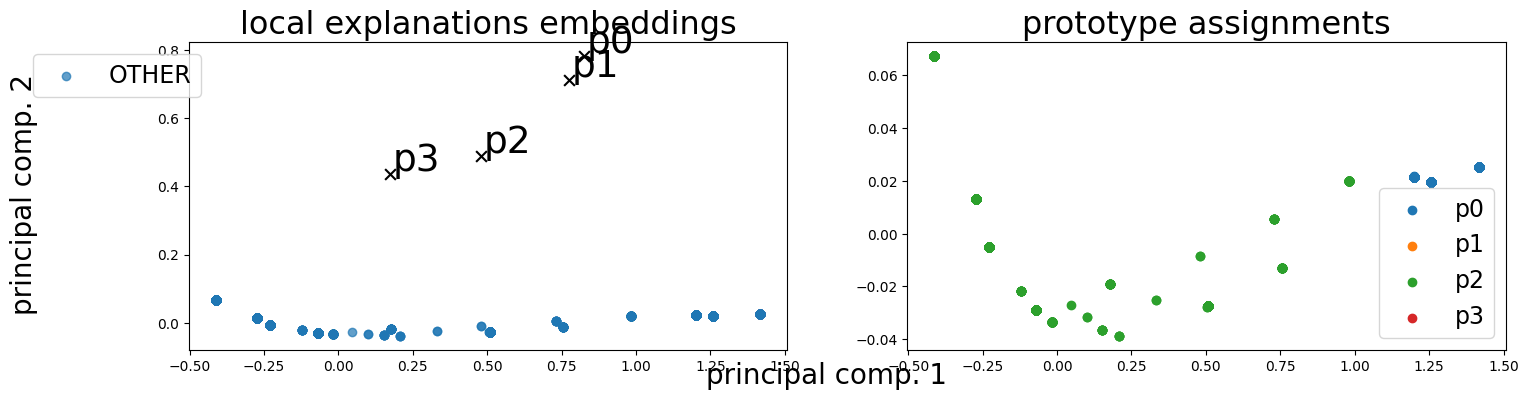

Alpha norms:
tensor([[1.0000, 0.8459, 0.8427, 0.9224],
        [0.8005, 0.7799, 1.0000, 0.8565]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 2]), array([ 756, 6329]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)
  1: Loss: 0.15078, LEN: 0.083227, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.11674, V. LEN 0.080
  2: Loss: 0.10681, LEN: 0.080377, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.10468, V. LEN 0.077
  3: Loss: 0.09539, LEN: 0.078061, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.09715, V. LEN 0.075
  4: Loss: 0.08961, LEN: 0.076328, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.09542, V. LEN 0.074
  5: Loss: 0.08524, LEN: 0.075222, Acc: 0.02, V. Acc: 0.11, V. Loss: 0.08740, V. LEN 0.073
  6: Loss: 0.08180, LEN: 0.074560, Acc: 0.23, V. Acc: 0.52, V. Loss: 0.08536, V. LEN 0.073
  7: Loss: 0.08012, LEN: 0.073908, Acc: 0.38, V. Acc: 0.12, V. Loss: 0.08200, V. LEN 0.072
  8: Loss: 0.07829, LEN: 0.073325, Acc: 0.13, V. Acc: 0.1

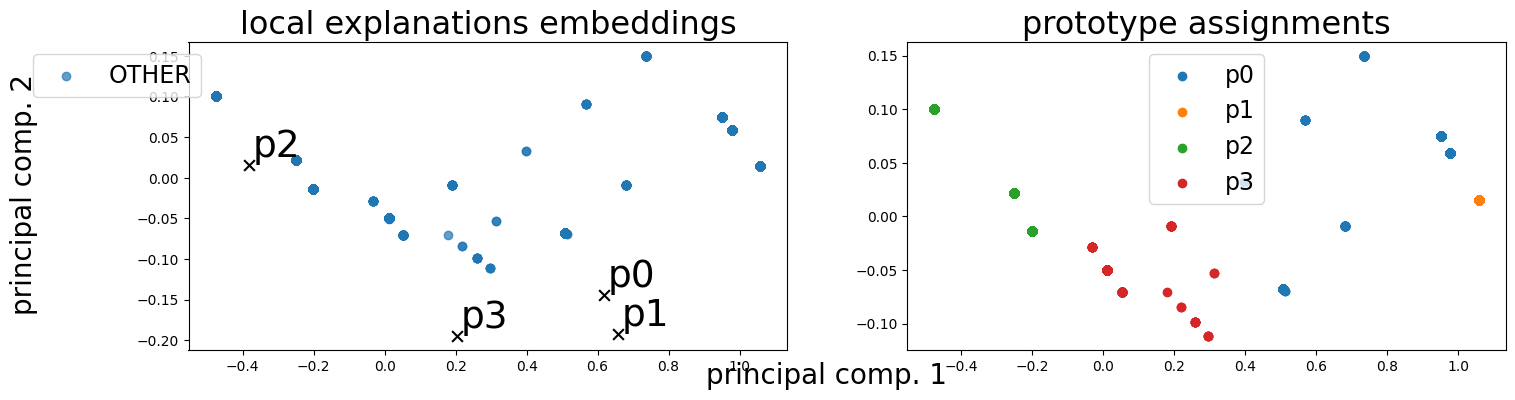

Alpha norms:
tensor([[0.8611, 1.0000, 0.2102, 0.5130],
        [0.3396, 1.0000, 0.1754, 0.4054]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 918,  141, 3403, 2623]))
Logic formulas:
For class 0:
0.8808 ((feature0000000002)
For class 1:
0.88144 (feature0000000000) | (feature0000000003) | (feature0000000001)
Accuracy as classifier:  0.8808
LEN fidelity:  tensor(0.8808)

 20: Loss: 0.04101, LEN: 0.039699, Acc: 0.89, V. Acc: 0.88, V. Loss: 0.04265, V. LEN 0.040
 21: Loss: 0.04235, LEN: 0.041275, Acc: 0.88, V. Acc: 0.88, V. Loss: 0.04280, V. LEN 0.040
 22: Loss: 0.04037, LEN: 0.039382, Acc: 0.89, V. Acc: 0.88, V. Loss: 0.04176, V. LEN 0.040
 23: Loss: 0.04021, LEN: 0.039292, Acc: 0.89, V. Acc: 0.88, V. Loss: 0.04309, V. LEN 0.041
 24: Loss: 0.04071, LEN: 0.039790, Acc: 0.89, V. Acc: 0.88, V. Loss: 0.04403, V. LEN 0.041
 25: Loss: 0.03881, LEN: 0.038005, Acc: 0.89, V. Acc: 0.88, V. Loss: 0.04338, V. LEN 0.041
 26: Loss: 0.03769, LEN: 0.037010, A

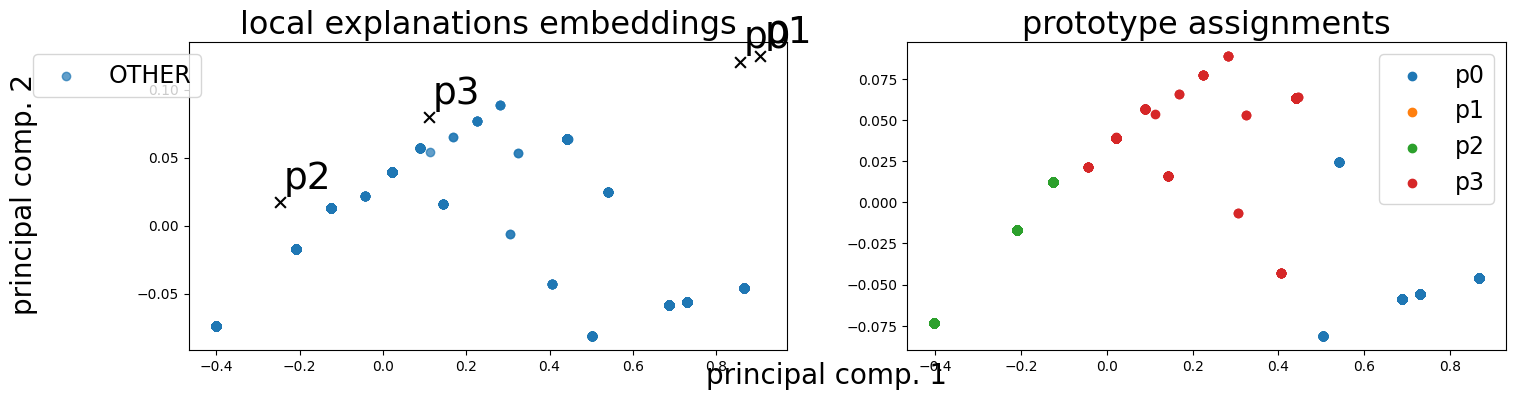

Alpha norms:
tensor([[0.2640, 1.0000, 0.0382, 0.0418],
        [0.1376, 1.0000, 0.0754, 0.1334]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 2, 3]), array([ 842, 3403, 2840]))
Logic formulas:
For class 0:
0.8808 ((feature0000000002)
For class 1:
0.88144 (feature0000000003) | (feature0000000000)
Accuracy as classifier:  0.8808
LEN fidelity:  tensor(0.8808)

 40: Loss: 0.03683, LEN: 0.036446, Acc: 0.90, V. Acc: 0.88, V. Loss: 0.04504, V. LEN 0.044
 41: Loss: 0.03475, LEN: 0.034445, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04510, V. LEN 0.044
 42: Loss: 0.03473, LEN: 0.034425, Acc: 0.90, V. Acc: 0.88, V. Loss: 0.04661, V. LEN 0.044
 43: Loss: 0.03578, LEN: 0.035470, Acc: 0.90, V. Acc: 0.88, V. Loss: 0.04629, V. LEN 0.044
 44: Loss: 0.03498, LEN: 0.034659, Acc: 0.90, V. Acc: 0.88, V. Loss: 0.04491, V. LEN 0.044
 45: Loss: 0.03507, LEN: 0.034809, Acc: 0.90, V. Acc: 0.88, V. Loss: 0.04548, V. LEN 0.044
 46: Loss: 0.03349, LEN: 0.033208, Acc: 0.91, V. Acc: 0.88, V. Loss

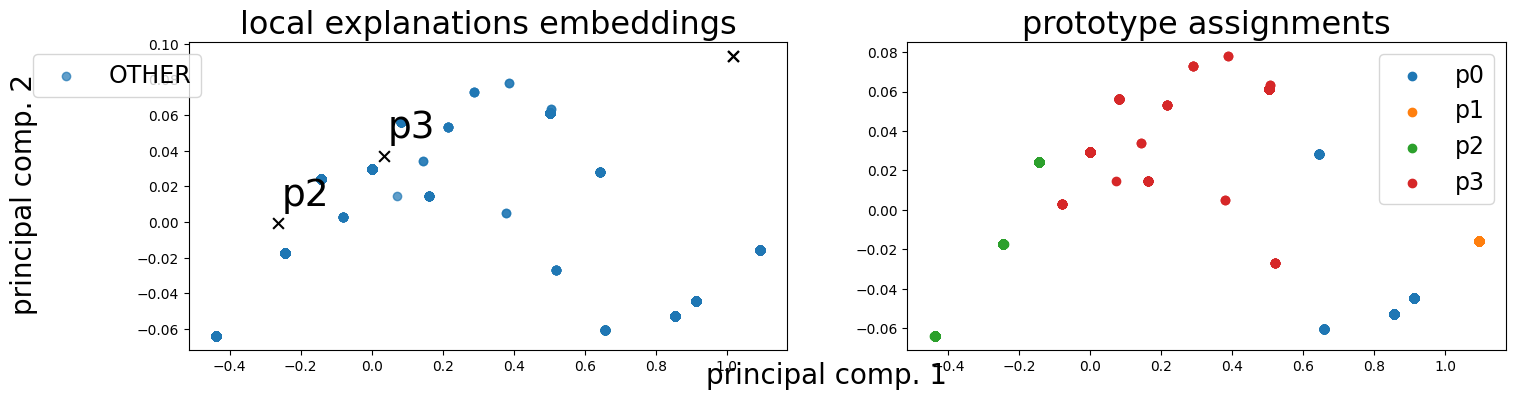

Alpha norms:
tensor([[0.2370, 1.0000, 0.0216, 0.0220],
        [0.1265, 1.0000, 0.0644, 0.0905]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 701,  141, 3403, 2840]))
Logic formulas:
For class 0:
0.8808 ((feature0000000002)
For class 1:
0.88144 (feature0000000003) | (feature0000000000) | (feature0000000001)
Accuracy as classifier:  0.8808
LEN fidelity:  tensor(0.8808)

 60: Loss: 0.03371, LEN: 0.033517, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04551, V. LEN 0.045
 61: Loss: 0.03293, LEN: 0.032757, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04481, V. LEN 0.044
 62: Loss: 0.03294, LEN: 0.032712, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04516, V. LEN 0.044
 63: Loss: 0.03434, LEN: 0.034132, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04696, V. LEN 0.044
 64: Loss: 0.03478, LEN: 0.034560, Acc: 0.90, V. Acc: 0.88, V. Loss: 0.04804, V. LEN 0.044
 65: Loss: 0.03337, LEN: 0.033176, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04523, V. LEN 0.044
 66: Loss: 0.03266, LEN: 0.032459, A

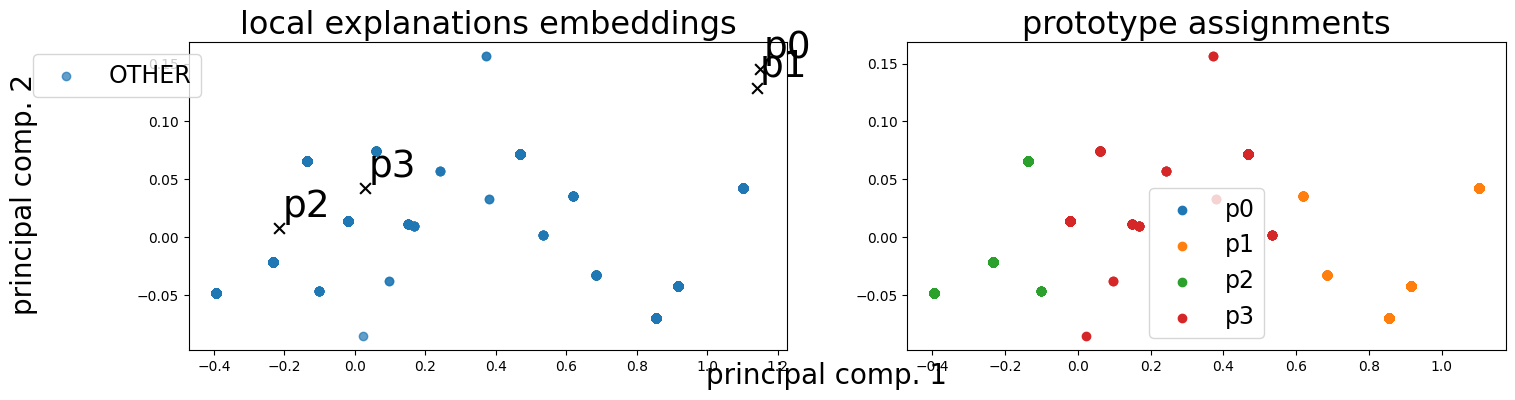

Alpha norms:
tensor([[0.2950, 1.0000, 0.0226, 0.0215],
        [0.2273, 1.0000, 0.1049, 0.1331]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([1, 2, 3]), array([ 842, 3414, 2829]))
Logic formulas:
For class 0:
0.8824 (feature0000000002)
For class 1:
0.8832 (feature0000000003) | (feature0000000001)
Accuracy as classifier:  0.8824
LEN fidelity:  tensor(0.8824)

 80: Loss: 0.03309, LEN: 0.032915, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04496, V. LEN 0.044
 81: Loss: 0.03283, LEN: 0.032604, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04514, V. LEN 0.045
 82: Loss: 0.03265, LEN: 0.032488, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04484, V. LEN 0.045
 83: Loss: 0.03301, LEN: 0.032843, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04507, V. LEN 0.045
 84: Loss: 0.03333, LEN: 0.033146, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04509, V. LEN 0.045
 85: Loss: 0.03250, LEN: 0.032332, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04598, V. LEN 0.045
 86: Loss: 0.03223, LEN: 0.032012, Acc: 0.92, V. Acc: 0.88, V. Loss: 

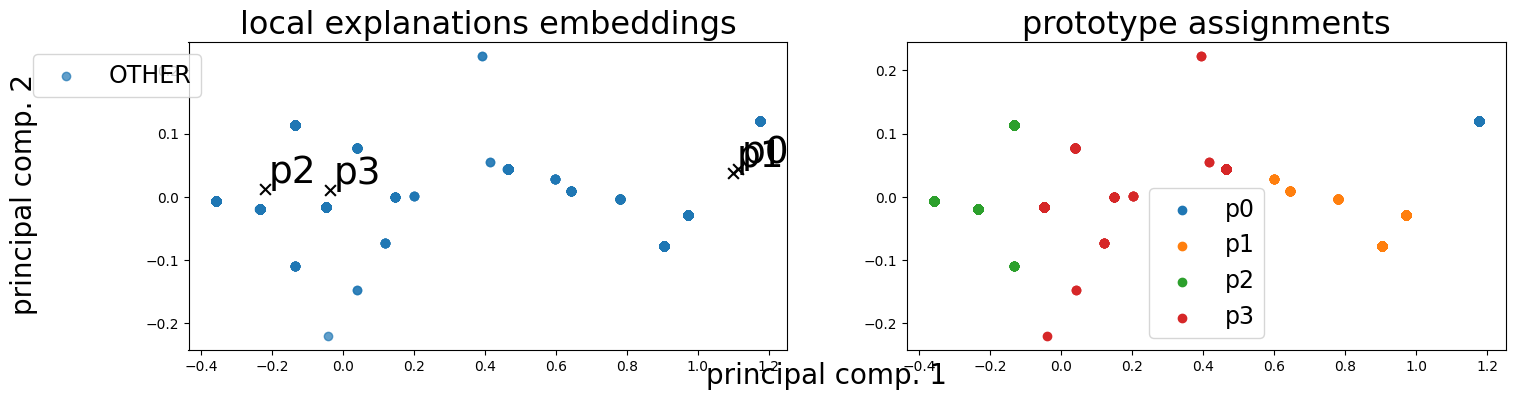

Alpha norms:
tensor([[0.3922, 1.0000, 0.0269, 0.0221],
        [0.3606, 1.0000, 0.1344, 0.1467]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 141,  709, 3414, 2821]))
Logic formulas:
For class 0:
0.8832 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.8832 (feature0000000003) | (feature0000000001) | (feature0000000000)
Accuracy as classifier:  0.8832
LEN fidelity:  tensor(0.8832)

100: Loss: 0.03167, LEN: 0.031559, Acc: 0.92, V. Acc: 0.88, V. Loss: 0.04515, V. LEN 0.045
101: Loss: 0.03251, LEN: 0.032409, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04496, V. LEN 0.045
102: Loss: 0.03200, LEN: 0.031898, Acc: 0.92, V. Acc: 0.88, V. Loss: 0.04486, V. LEN 0.044
103: Loss: 0.03266, LEN: 0.032555, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04511, V. LEN 0.044
104: Loss: 0.03300, LEN: 0.032888, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04510, V. LEN 0.044
105: Loss: 0.03263, LEN: 0.032538, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04476, V. LEN 0

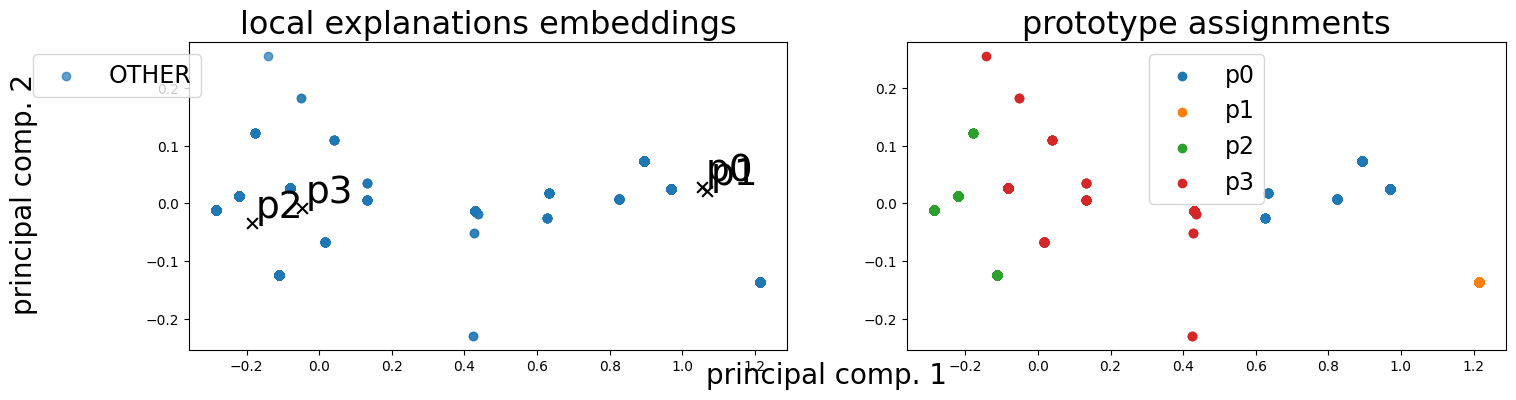

Alpha norms:
tensor([[0.5465, 1.0000, 0.0318, 0.0235],
        [0.5318, 1.0000, 0.1569, 0.1512]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 709,  141, 3414, 2821]))
Logic formulas:
For class 0:
0.8832 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.8832 (feature0000000000) | ((feature0000000003) | (feature0000000001)
Accuracy as classifier:  0.8832
LEN fidelity:  tensor(0.8832)

120: Loss: 0.03278, LEN: 0.032684, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04505, V. LEN 0.044
121: Loss: 0.03302, LEN: 0.032931, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02771, V. LEN 0.027
122: Loss: 0.03192, LEN: 0.031833, Acc: 0.92, V. Acc: 0.88, V. Loss: 0.04513, V. LEN 0.044
123: Loss: 0.03291, LEN: 0.032838, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04496, V. LEN 0.044
124: Loss: 0.03257, LEN: 0.032500, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04501, V. LEN 0.044
125: Loss: 0.03269, LEN: 0.032615, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04500, V. LEN 

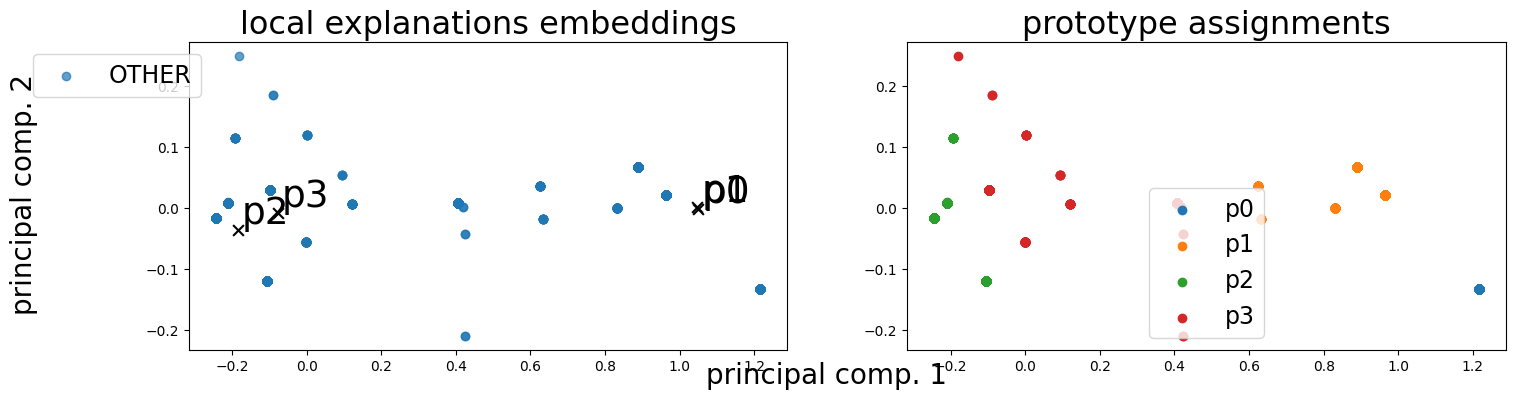

Alpha norms:
tensor([[0.2893, 1.0000, 0.0228, 0.0167],
        [0.2154, 1.0000, 0.0990, 0.0952]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 141,  709, 3414, 2821]))
Logic formulas:
For class 0:
0.8832 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.8832 (feature0000000001) | ((feature0000000003) | (feature0000000000)
Accuracy as classifier:  0.8832
LEN fidelity:  tensor(0.8832)

140: Loss: 0.03281, LEN: 0.032736, Acc: 0.91, V. Acc: 0.88, V. Loss: 0.04486, V. LEN 0.044
141: Loss: 0.03195, LEN: 0.031889, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02705, V. LEN 0.027
142: Loss: 0.03237, LEN: 0.032310, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02720, V. LEN 0.027
143: Loss: 0.03250, LEN: 0.032438, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02755, V. LEN 0.027
144: Loss: 0.03212, LEN: 0.032045, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02696, V. LEN 0.027
145: Loss: 0.03202, LEN: 0.031963, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02785, V. LEN 

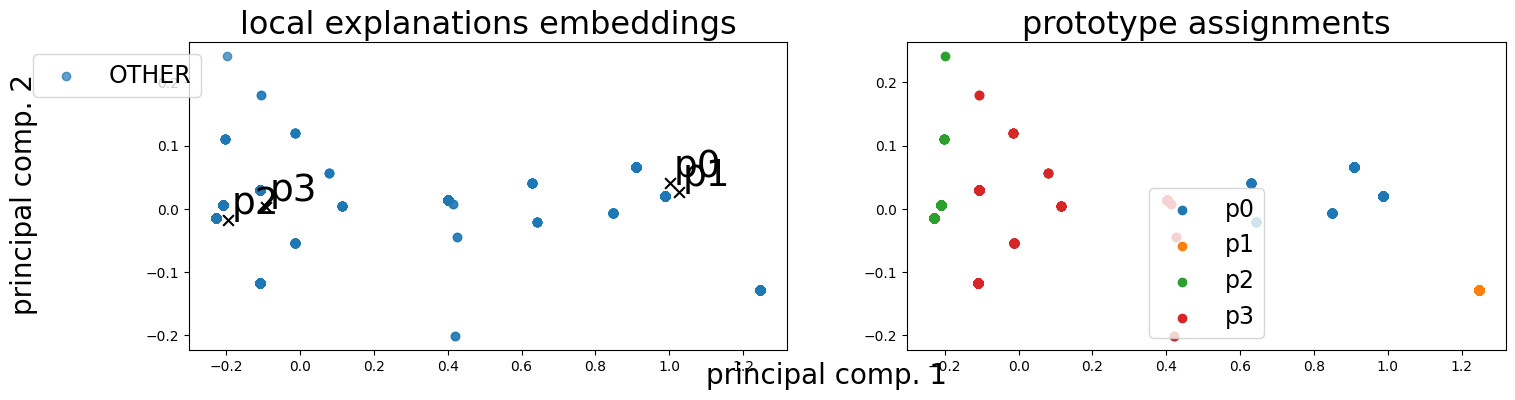

Alpha norms:
tensor([[0.3511, 1.0000, 0.0264, 0.0190],
        [0.3006, 1.0000, 0.1235, 0.1135]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 709,  141, 2683, 3552]))
Logic formulas:
For class 0:
0.92624 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.92624 (feature0000000000) | ((feature0000000003) | (feature0000000001)
Accuracy as classifier:  0.9262
LEN fidelity:  tensor(0.9262)

160: Loss: 0.03251, LEN: 0.032460, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02709, V. LEN 0.027
161: Loss: 0.03159, LEN: 0.031535, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02696, V. LEN 0.027
162: Loss: 0.03195, LEN: 0.031894, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02692, V. LEN 0.027
163: Loss: 0.03209, LEN: 0.032027, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02694, V. LEN 0.027
164: Loss: 0.03141, LEN: 0.031370, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02682, V. LEN 0.027
165: Loss: 0.03217, LEN: 0.032114, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02694, V. LE

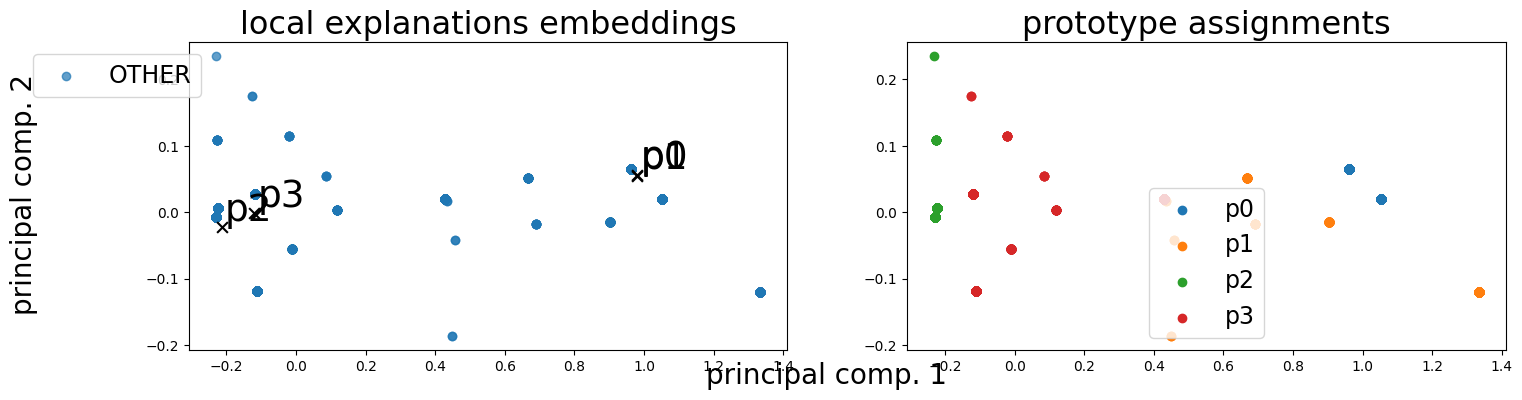

Alpha norms:
tensor([[0.2543, 1.0000, 0.0242, 0.0152],
        [0.2039, 1.0000, 0.1039, 0.0770]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 615,  241, 2683, 3546]))
Logic formulas:
For class 0:
0.92624 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.92624 (feature0000000000) | ((feature0000000003) | (feature0000000001)
Accuracy as classifier:  0.9262
LEN fidelity:  tensor(0.9262)

180: Loss: 0.03106, LEN: 0.031000, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02685, V. LEN 0.027
181: Loss: 0.03247, LEN: 0.032414, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02682, V. LEN 0.027
182: Loss: 0.03198, LEN: 0.031930, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02692, V. LEN 0.027
183: Loss: 0.03220, LEN: 0.032151, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02678, V. LEN 0.027
184: Loss: 0.03233, LEN: 0.032289, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02705, V. LEN 0.027
185: Loss: 0.03172, LEN: 0.031680, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02688, V. LE

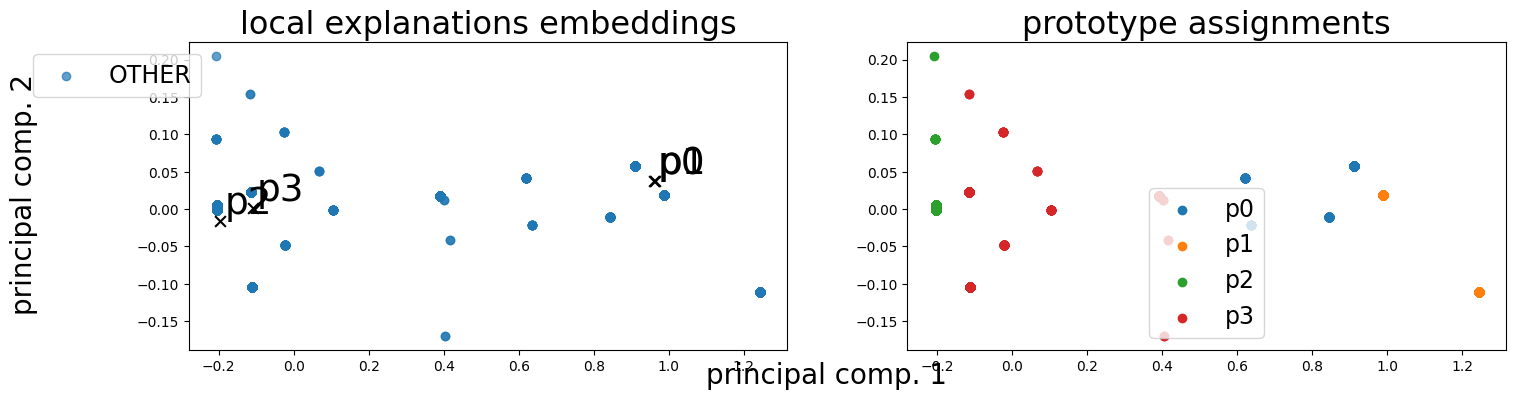

Alpha norms:
tensor([[0.5771, 1.0000, 0.0341, 0.0219],
        [0.5734, 1.0000, 0.1779, 0.1282]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 304,  546, 2683, 3552]))
Logic formulas:
For class 0:
0.92624 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.92624 (feature0000000001) | ((feature0000000003) | (feature0000000000)
Accuracy as classifier:  0.9262
LEN fidelity:  tensor(0.9262)

200: Loss: 0.03274, LEN: 0.032704, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02692, V. LEN 0.027
201: Loss: 0.03187, LEN: 0.031821, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02665, V. LEN 0.027
202: Loss: 0.03136, LEN: 0.031323, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02682, V. LEN 0.027
203: Loss: 0.03238, LEN: 0.032337, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02695, V. LEN 0.027
204: Loss: 0.03208, LEN: 0.032034, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02682, V. LEN 0.027
205: Loss: 0.03169, LEN: 0.031652, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02687, V. LE

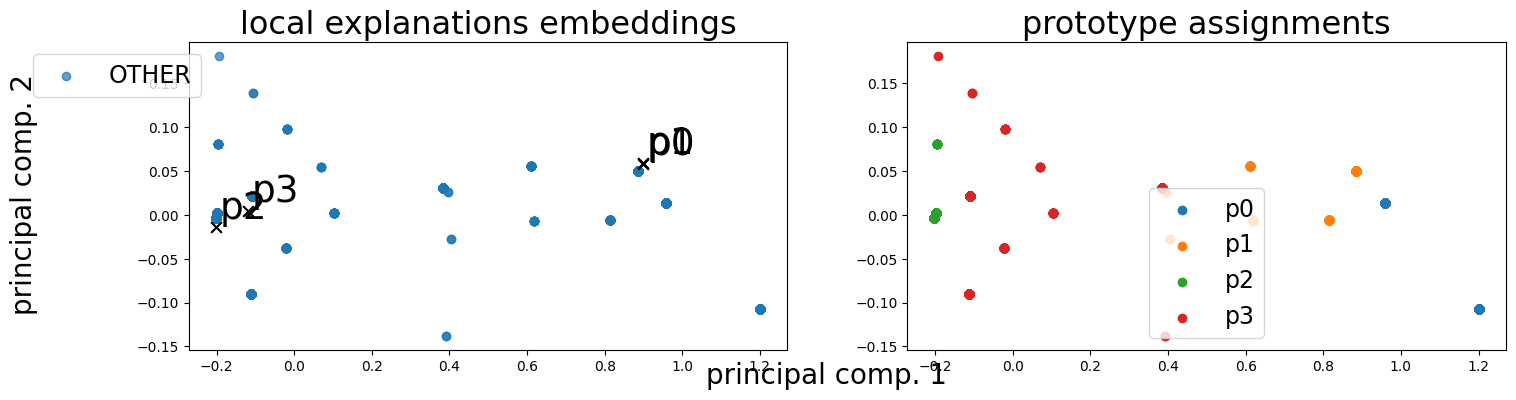

Alpha norms:
tensor([[0.9320, 1.0000, 0.0352, 0.0224],
        [0.6171, 1.0000, 0.1792, 0.1210]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 546,  308, 2682, 3549]))
Logic formulas:
For class 0:
0.92608 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.92608 (feature0000000000) | ((feature0000000003) | (feature0000000001)
Accuracy as classifier:  0.9261
LEN fidelity:  tensor(0.9261)

220: Loss: 0.03150, LEN: 0.031455, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02688, V. LEN 0.027
221: Loss: 0.03211, LEN: 0.032070, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02690, V. LEN 0.027
222: Loss: 0.03179, LEN: 0.031756, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02689, V. LEN 0.027
223: Loss: 0.03123, LEN: 0.031196, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02678, V. LEN 0.027
224: Loss: 0.03234, LEN: 0.032299, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02684, V. LEN 0.027
225: Loss: 0.03222, LEN: 0.032187, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02692, V. LE

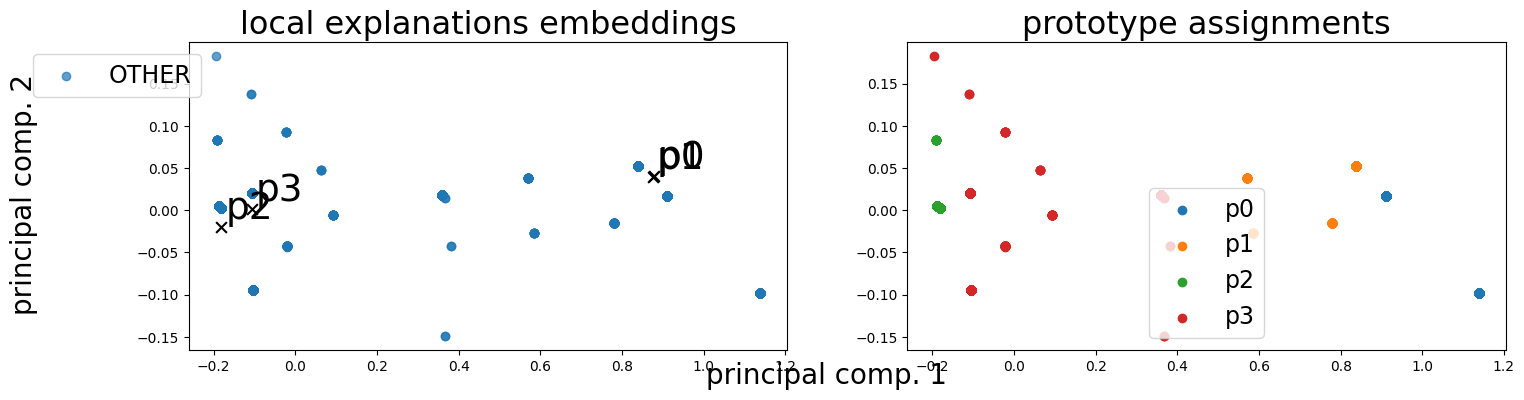

Alpha norms:
tensor([[0.9392, 1.0000, 0.0353, 0.0225],
        [0.6012, 1.0000, 0.1826, 0.1215]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 546,  304, 2682, 3553]))
Logic formulas:
For class 0:
0.92608 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.92608 (feature0000000000) | ((feature0000000003) | (feature0000000001)
Accuracy as classifier:  0.9261
LEN fidelity:  tensor(0.9261)

240: Loss: 0.03125, LEN: 0.031223, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02680, V. LEN 0.027
241: Loss: 0.03175, LEN: 0.031710, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02683, V. LEN 0.027
242: Loss: 0.03286, LEN: 0.032826, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02698, V. LEN 0.027
243: Loss: 0.03240, LEN: 0.032361, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02674, V. LEN 0.027
244: Loss: 0.03231, LEN: 0.032270, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02698, V. LEN 0.027
245: Loss: 0.03121, LEN: 0.031176, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02675, V. LE

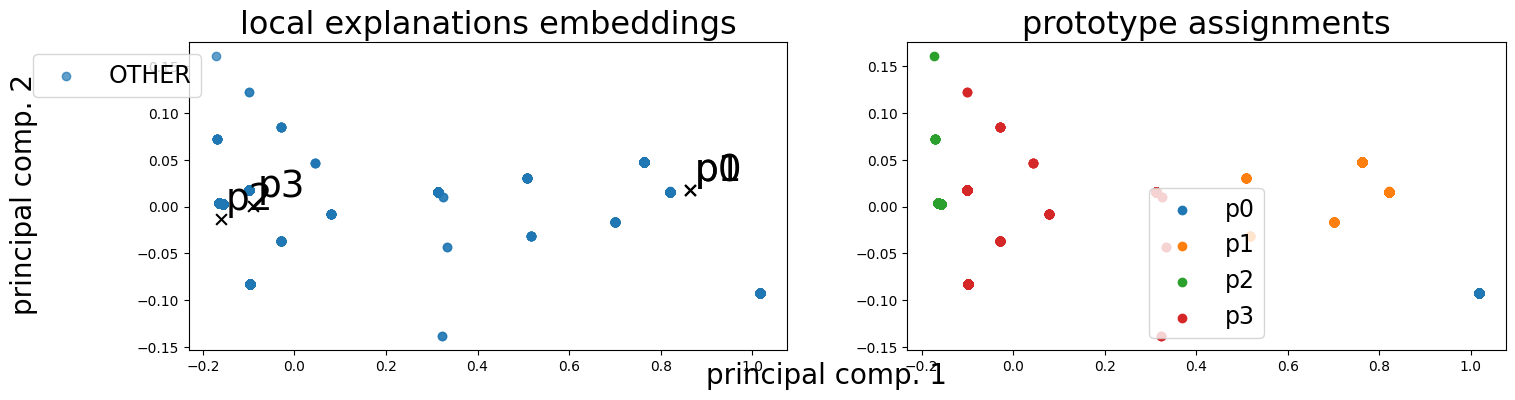

Alpha norms:
tensor([[1.0000, 0.8430, 0.0356, 0.0216],
        [0.7115, 1.0000, 0.2072, 0.1278]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 141,  709, 2683, 3552]))
Logic formulas:
For class 0:
0.92624 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.92624 (feature0000000001) | ((feature0000000003) | (feature0000000000)
Accuracy as classifier:  0.9262
LEN fidelity:  tensor(0.9262)

260: Loss: 0.03184, LEN: 0.031822, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02696, V. LEN 0.027
261: Loss: 0.03198, LEN: 0.031960, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02695, V. LEN 0.027
262: Loss: 0.03204, LEN: 0.032010, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02679, V. LEN 0.027
263: Loss: 0.03210, LEN: 0.032072, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02687, V. LEN 0.027
264: Loss: 0.03265, LEN: 0.032618, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02692, V. LEN 0.027
265: Loss: 0.03173, LEN: 0.031693, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02692, V. LE

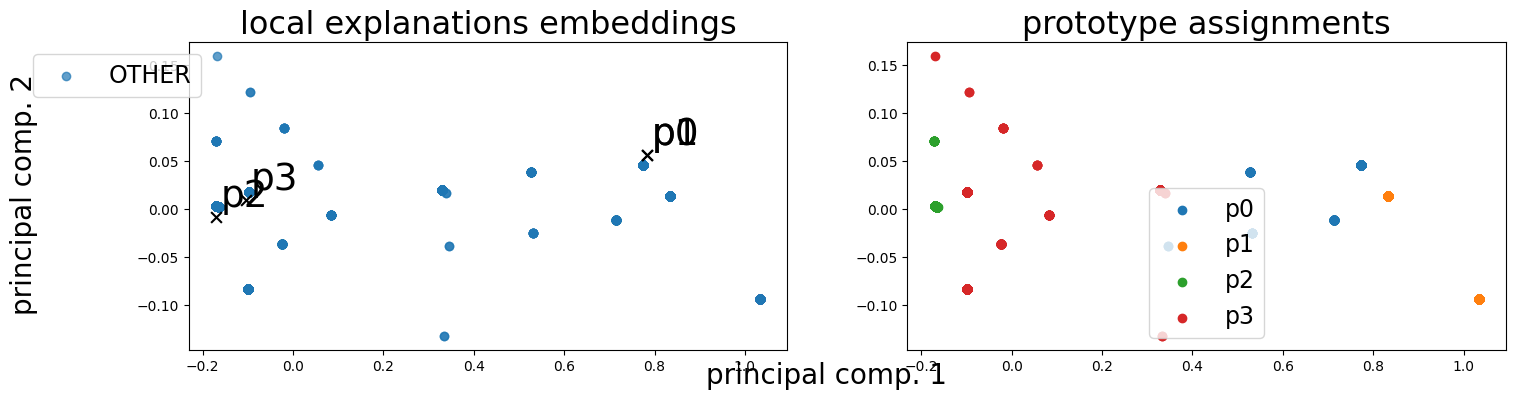

Alpha norms:
tensor([[1.0000, 0.8116, 0.0318, 0.0190],
        [0.6673, 1.0000, 0.1874, 0.1084]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 306,  546, 2682, 3551]))
Logic formulas:
For class 0:
0.92608 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.92608 (feature0000000001) | ((feature0000000003) | (feature0000000000)
Accuracy as classifier:  0.9261
LEN fidelity:  tensor(0.9261)

280: Loss: 0.03154, LEN: 0.031508, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02681, V. LEN 0.027
281: Loss: 0.03237, LEN: 0.032338, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02675, V. LEN 0.027
282: Loss: 0.03278, LEN: 0.032742, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02698, V. LEN 0.027
283: Loss: 0.03130, LEN: 0.031278, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02685, V. LEN 0.027
284: Loss: 0.03129, LEN: 0.031269, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02684, V. LEN 0.027
285: Loss: 0.03202, LEN: 0.031988, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02687, V. LE

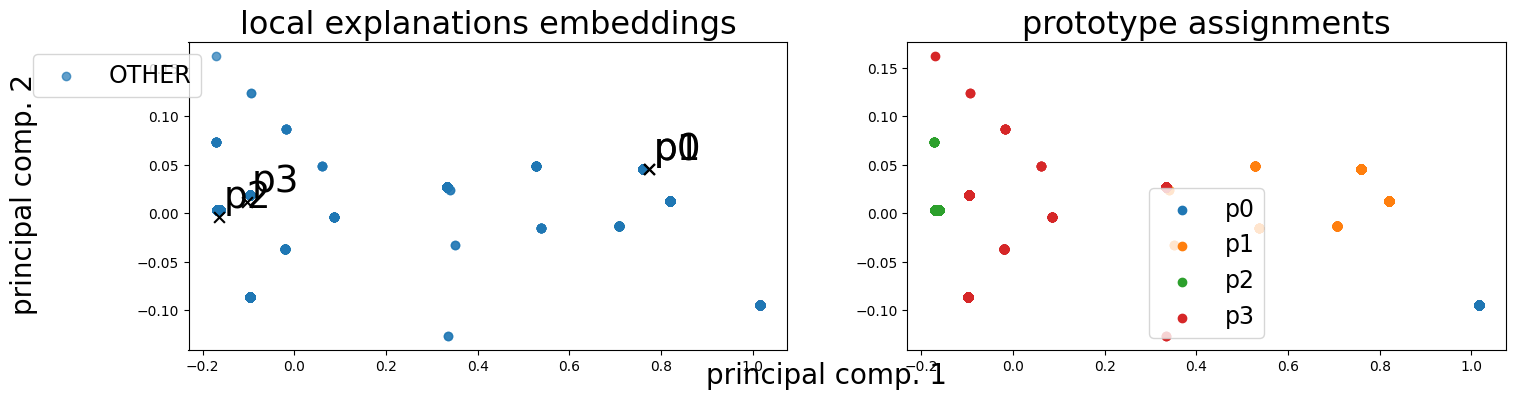

Alpha norms:
tensor([[1.0000, 0.7442, 0.0316, 0.0190],
        [0.7151, 1.0000, 0.2081, 0.1156]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([ 141,  713, 2682, 3549]))
Logic formulas:
For class 0:
0.92608 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.92608 (feature0000000001) | ((feature0000000003) | (feature0000000000)
Accuracy as classifier:  0.9261
LEN fidelity:  tensor(0.9261)

300: Loss: 0.03148, LEN: 0.031461, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02679, V. LEN 0.027
301: Loss: 0.03184, LEN: 0.031823, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02693, V. LEN 0.027
302: Loss: 0.03170, LEN: 0.031671, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02689, V. LEN 0.027
303: Loss: 0.03191, LEN: 0.031885, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02687, V. LEN 0.027
304: Loss: 0.03279, LEN: 0.032762, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02699, V. LEN 0.027
305: Loss: 0.03273, LEN: 0.032706, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02693, V. LE

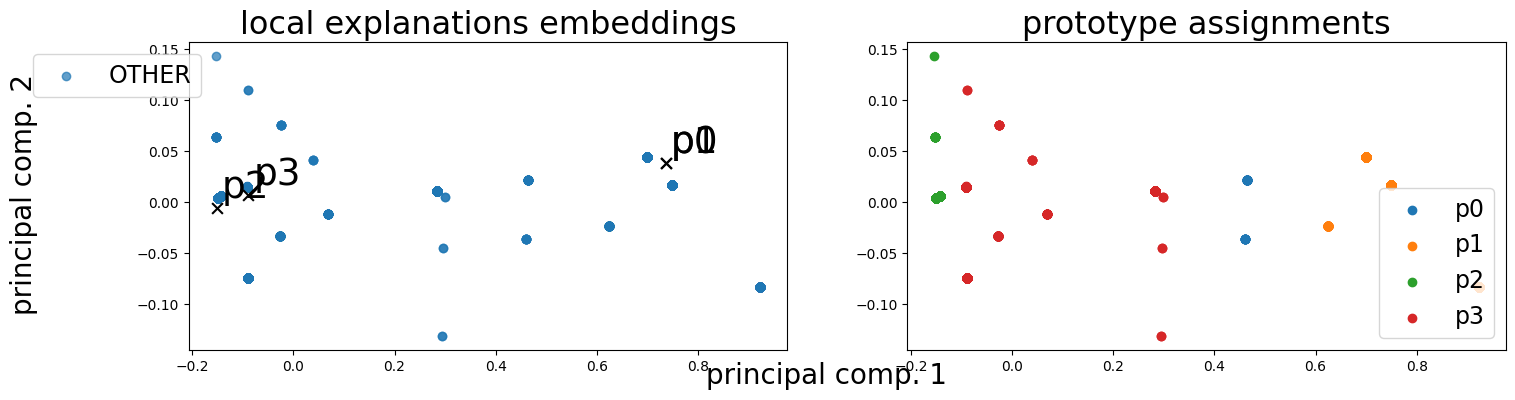

Alpha norms:
tensor([[1.0000, 0.6108, 0.0287, 0.0173],
        [0.7984, 1.0000, 0.2114, 0.1163]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([  36,  814, 2683, 3552]))
Logic formulas:
For class 0:
0.92624 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.92624 (feature0000000001) | ((feature0000000003) | (feature0000000000)
Accuracy as classifier:  0.9262
LEN fidelity:  tensor(0.9262)

320: Loss: 0.03259, LEN: 0.032558, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02708, V. LEN 0.027
321: Loss: 0.03235, LEN: 0.032312, Acc: 0.91, V. Acc: 0.93, V. Loss: 0.02696, V. LEN 0.027
322: Loss: 0.03201, LEN: 0.031986, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02694, V. LEN 0.027
323: Loss: 0.03193, LEN: 0.031902, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02697, V. LEN 0.027
324: Loss: 0.03233, LEN: 0.032304, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02698, V. LEN 0.027
325: Loss: 0.03247, LEN: 0.032443, Acc: 0.92, V. Acc: 0.93, V. Loss: 0.02700, V. LE

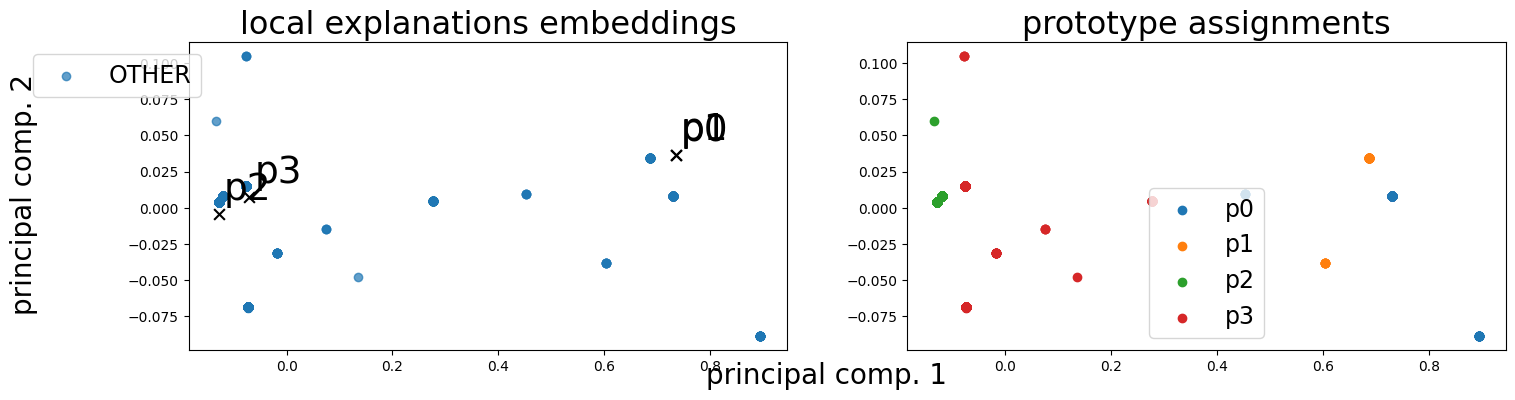

Alpha norms:
tensor([[1.0000, 0.7515, 0.0341, 0.0200],
        [0.6583, 1.0000, 0.2025, 0.1056]])
Concept Purity: 1.000000 +- 0.000000
Concept distribution:  (array([0, 1, 2, 3]), array([130,  52, 660, 901]))
Logic formulas:
For class 0:
0.9329863370201692 (feature0000000002) | ((feature0000000003 & feature0000000002)
For class 1:
0.9329863370201692 (feature0000000000) | ((feature0000000003) | (feature0000000001)
Accuracy as classifier:  0.933
LEN fidelity:  tensor(0.9330)


In [6]:
expl.iterate(train_group_loader, test_group_loader, plot=True)
expl.inspect(test_group_loader)

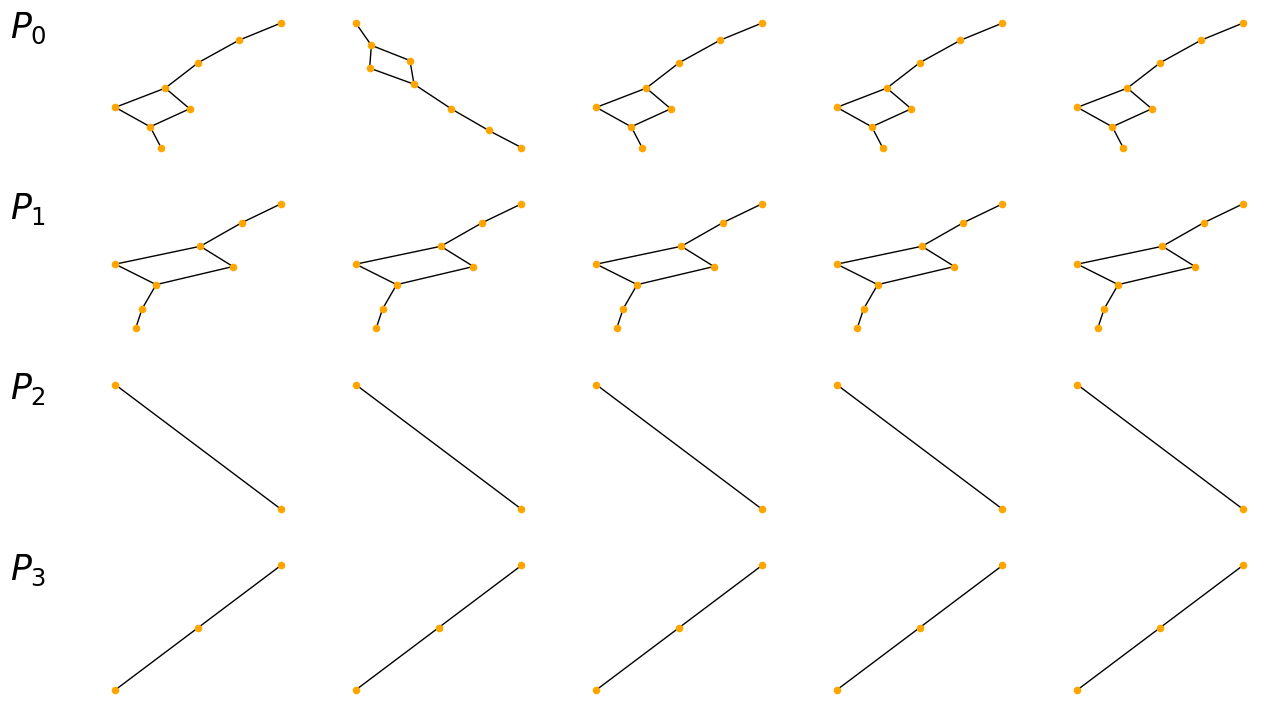

In [7]:
expl.hyper["assign_func"] = "sim"

x_train, emb, concepts_assignement, y_train_1h, le_classes, le_idxs, belonging = expl.get_concept_vector(
	test_group_loader,
	return_raw=True)
expl.hyper["assign_func"] = "discrete"

proto_names = {
	0: "BA",
	1: "Wheel",
	2: "Mix",
	3: "Grid",
	4: "House",
	5: "Grid",
}
torch.manual_seed(42)
fig = plt.figure(figsize=(15, 5 * 1.8))
n = 0
for p in range(expl.hyper["num_prototypes"]):
	idxs = le_idxs[concepts_assignement.argmax(-1) == p]
	# idxs = idxs[torch.randperm(len(idxs))]    # random
	sa = concepts_assignement[concepts_assignement.argmax(-1) == p]
	idxs = idxs[torch.argsort(sa[:, p], descending=True)]
	for ex in range(min(5, len(idxs))):
		n += 1
		ax = plt.subplot(expl.hyper["num_prototypes"], 5, n)
		G = to_networkx(dataset_test[int(idxs[ex])], to_undirected=True,
						remove_self_loops=True)
		pos = nx.spring_layout(G, seed=42)
		nx.draw(G, pos, node_size=20, ax=ax, node_color="orange")
		ax.axis("on")
		plt.box(False)

for p in range(expl.hyper["num_prototypes"]):
	plt.subplot(expl.hyper["num_prototypes"], 5, 5 * p + 1)
	plt.ylabel(f"$P_{p}$\n", size=25, rotation="horizontal",
			   labelpad=50)

plt.show()